# 1.Importing libreries

In [1]:
import pandas as pd # loading data set to pandas dataframe

# 2.Importing dataset

In [2]:
data=pd.read_csv("heart 3.csv")

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Taking care of missing variable

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.shape

(1025, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 4.Taking care of duplicate variable

In [7]:
d=data.duplicated().any()

In [8]:
d

True

In [9]:
data=data.drop_duplicates()

In [10]:
d=data.duplicated().any()
d

False

In [11]:
data.shape

(302, 14)

# 5.Preprocessing

In [12]:
cate_val=[]#for categorical
cont_val=[]#for nuemerical
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
#7. feature scaling
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [17]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.020000e+02,302.000000,302.000000,3.020000e+02,3.020000e+02,302.000000,302.000000,3.020000e+02,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000
mean,-2.721103e-16,0.682119,0.963576,-6.690748e-16,-4.411482e-18,0.149007,0.526490,-5.418771e-16,0.327815,8.822964e-17,1.397351,0.718543,2.314570,0.543046
std,1.001660e+00,0.466426,1.032044,1.001660e+00,1.001660e+00,0.356686,0.526027,1.001660e+00,0.470196,1.001660e+00,0.616274,1.006748,0.613026,0.498970
min,-2.814192e+00,0.000000,0.000000,-2.144521e+00,-2.332210e+00,0.000000,0.000000,-3.436149e+00,0.000000,-8.995441e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.107878e-01,0.000000,0.000000,-6.617119e-01,-6.870826e-01,0.000000,0.000000,-7.137164e-01,0.000000,-8.995441e-01,1.000000,0.000000,2.000000,0.000000
50%,1.195033e-01,1.000000,1.000000,-9.140084e-02,-1.161266e-01,0.000000,1.000000,1.281605e-01,0.000000,-2.096081e-01,1.000000,0.000000,2.000000,1.000000
75%,7.283833e-01,1.000000,2.000000,4.789102e-01,5.467629e-01,0.000000,1.000000,7.185677e-01,1.000000,4.803280e-01,2.000000,1.000000,3.000000,1.000000
max,2.499671e+00,1.000000,3.000000,3.900776e+00,6.145034e+00,1.000000,2.000000,2.292987e+00,1.000000,4.447460e+00,2.000000,4.000000,3.000000,1.000000


# 8.Splitting dataset into the training and test set(splitting features and target)

In [18]:
X=data.drop('target',axis=1)#target is dependant variable
#whenever need to drop clumn,we need to set axis=1,whenever need to drop row,we need to set axis=0.

In [19]:
y=data['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 9.Logistic regression

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# 8.SVM

In [28]:
from sklearn import svm

In [29]:
svm=svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2=svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

# 9.KNeighbors classifiers

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [38]:
#using find better values of n_neighbors
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred3=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred3))

In [39]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [40]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7540983606557377

# Non linear classification

In [41]:
#here pre processing not required

In [42]:
data=pd.read_csv('heart 3.csv')

In [43]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
data=data.drop_duplicates()

In [45]:
data.shape

(302, 14)

In [46]:
X=data.drop('target',axis=1)
y=data['target']

In [47]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 12.DT classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4=dt.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

# 14. Randomforest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8360655737704918

# 15. Gradient boosting classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
grb=GradientBoostingClassifier()
grb.fit(X_train,y_train)
y_pred6=grb.predict(X_test)
accuracy_score(y_test,y_pred6)


0.8032786885245902

# Combine accuracy score

In [61]:
final_data=pd.DataFrame({
    'Models':['LR','SVM','KNN','DT','RF','GB'],
    'ACC':[accuracy_score(y_test,y_pred1),
          accuracy_score(y_test,y_pred2),
          accuracy_score(y_test,y_pred3),
          accuracy_score(y_test,y_pred4),
          accuracy_score(y_test,y_pred5),
          accuracy_score(y_test,y_pred6)]
}
)

In [62]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.754098
3,DT,0.704918
4,RF,0.836066
5,GB,0.803279


/Users/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

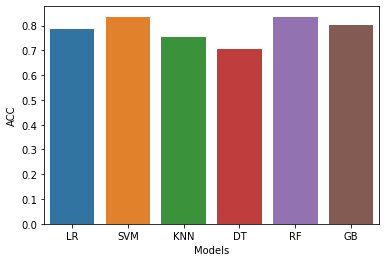

In [63]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])


In [64]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [65]:
X=data.drop('target',axis=1)
y=data['target']

In [66]:
X.shape

(302, 13)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Predicting on new data

In [70]:
import pandas as pd
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [71]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [72]:
rf.predict(new_data)

array([0])

In [73]:
p=rf.predict(new_data)
if p==0:
    print("No disease")
else:
    print("disease")

No disease


# Save model using joblib

In [75]:
import joblib

In [76]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [77]:
model=joblib.load('model_joblib_heart')

In [78]:
model.predict(new_data)

array([0])

In [1]:
# GUI

from tkinter import*
import joblib#to load our saved model

def show_entry():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    
    
    model=joblib.load('model_joblib_heart')
    r=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    Label(master,text="Heart disease prediction").grid(row=20)
    if r==0:
        Label(master,text="no heart disease").grid(row=22)
    else:
        Label(master,text="heart disease").grid(row=22)
        
        
    
        
master=Tk()
master.title("Heart disease prediction")
label=Label(master,text="Heart disease prediction",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master,text="Enter your age:").grid(row=1)
Label(master,text="Male/Female[0/1]:").grid(row=2)
Label(master,text="Enter value of cp:").grid(row=3)
Label(master,text="Enter value of trestbps:").grid(row=4)
Label(master,text="Enter value chol:").grid(row=5)
Label(master,text="Enter value of fbs:").grid(row=6)
Label(master,text="Enter value of restecg:").grid(row=7)
Label(master,text="Enter value of thalach:").grid(row=8)
Label(master,text="Enter value exang:").grid(row=9)
Label(master,text="Enter value of oldpeak:").grid(row=10)
Label(master,text="Enter value of slope:").grid(row=11)
Label(master,text="Enter value of ca:").grid(row=12)
Label(master,text="Enter value thal:").grid(row=13)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master,text="Predict",command=show_entry).grid(row=14)




mainloop()